In [2]:
# 便利なモジュールを一通りimportしておきます
import numpy as np
from numpy.random import randn
import pandas as pd

# 統計的な機能を実現するモジュール
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# 離散一様分布について

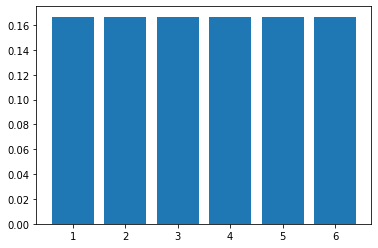

In [7]:
# 仮想的なサイコロを作って離散一様分布を理解する

roll_options = [1,2,3,4,5,6]

# 確率の総和
tprob = 1

# 公正なサイコロ
prob_roll = tprob / len(roll_options)

uni_plot = plt.bar(roll_options,[prob_roll]*6 )

In [8]:
from scipy.stats import randint

In [9]:
low,high = 1,7

mean, var = randint.stats(low,high)
print('平均{} 分散{}'.format(mean,var))

平均3.5 分散2.9166666666666665


<BarContainer object of 6 artists>

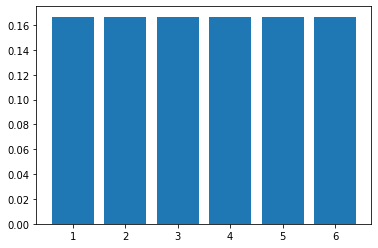

In [10]:
plt.bar(roll_options, randint.pmf(roll_options,low,high))